In [3]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [4]:
#!pip install -q pydot

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
print (tf.__version__)

2.7.0


In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

57344/49082 [===================================] - 0s 4us/step


In [9]:
nome_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [10]:
dataset= pd.read_csv(dataset_path,
                    names=nome_colunas,
                    na_values = "?",
                    comment = '\t',
                    sep = " ",
                    skipinitialspace=True)

In [11]:
dataset.shape

(506, 14)

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

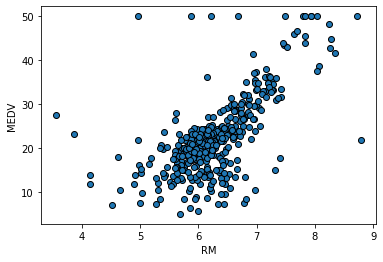

In [17]:
fig,ax = plt.subplots()
x=dados_treino['RM']
y = dados_treino ['MEDV']
ax.scatter(x,y,edgecolors = (0,0,0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [18]:
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

In [21]:
#função para construir o modelo 
def modelo_linear():
    model=keras.Sequential([layers.Dense(1,use_bias = True, input_shape = (1,), name = 'layer')])
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01,
                                        beta_1 = 0.9,
                                        beta_2 = 0.99,
                                        amsgrad =False,
                                        name = 'Adam')
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae','mse'])
    return model

In [22]:
modelo = modelo_linear()

In [27]:
#!pip install pydot

In [28]:
tf.keras.utils.plot_model(modelo,
                         to_file = 'imagens/modelo.png',
                         show_shapes = True,
                         show_layer_names = True,
                         rankdir = 'TB',
                         expand_nested = False,
                         dpi = 100)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [31]:
#treinamento do modelo
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [32]:
#Callbacks
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                patience = n_idle_epochs,
                                                min_delta = 0.001)

In [33]:
predictions_list = []

In [34]:
#caminho para salvar os dados:
checkpoint_path= "dados/"

In [35]:
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/",
                                                       verbose = 1,
                                                       save_weights_only = True,
                                                       save_freq = n_samples_save)

In [36]:
#salvando a primeira versão...
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [38]:
#treinamento
history = modelo.fit(x_treino,
                    y_treino,
                    batch_size = batch_size,
                    epochs = n_epochs,
                    validation_split = 0.1,
                    verbose = 1,
                    callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 4s 777ms/step - loss: 437.3876 - mae: 19.1076 - mse: 437.3876 - val_loss: 518.3526 - val_mae: 20.3596 - val_mse: 518.3526
Epoch 2/4000
2/2 [==============================] - 0s 69ms/step - loss: 431.7062 - mae: 18.9622 - mse: 431.7062 - val_loss: 512.3154 - val_mae: 20.2137 - val_mse: 512.3154
Epoch 3/4000
2/2 [==============================] - 0s 57ms/step - loss: 426.0039 - mae: 18.8168 - mse: 426.0039 - val_loss: 506.3226 - val_mae: 20.0679 - val_mse: 506.3226
Epoch 4/4000
2/2 [==============================] - 0s 59ms/step - loss: 420.4786 - mae: 18.6719 - mse: 420.4786 - val_loss: 500.3743 - val_mae: 19.9222 - val_mse: 500.3743
Epoch 5/4000
2/2 [==============================] - 0s 60ms/step - loss: 414.9160 - mae: 18.5266 - mse: 414.9160 - val_loss: 494.4817 - val_mae: 19.7767 - val_mse: 494.4817
Epoch 6/4000
2/2 [==============================] - 0s 61ms/step - loss: 409.3528 - mae: 18.3816 - mse: 409.3528 - val_loss: 488.6389 

2/2 [==============================] - 0s 83ms/step - loss: 226.6046 - mae: 12.8052 - mse: 226.6046 - val_loss: 292.7763 - val_mae: 14.0807 - val_mse: 292.7763
Epoch 49/4000
2/2 [==============================] - 0s 85ms/step - loss: 223.3086 - mae: 12.6901 - mse: 223.3086 - val_loss: 289.2084 - val_mae: 13.9670 - val_mse: 289.2084
Epoch 50/4000
2/2 [==============================] - 0s 69ms/step - loss: 220.1004 - mae: 12.5761 - mse: 220.1004 - val_loss: 285.6829 - val_mae: 13.8538 - val_mse: 285.6829
Epoch 51/4000
2/2 [==============================] - 0s 67ms/step - loss: 216.9125 - mae: 12.4617 - mse: 216.9125 - val_loss: 282.2100 - val_mae: 13.7412 - val_mse: 282.2100
Epoch 52/4000
2/2 [==============================] - 0s 78ms/step - loss: 213.7266 - mae: 12.3485 - mse: 213.7266 - val_loss: 278.7876 - val_mae: 13.6292 - val_mse: 278.7876
Epoch 53/4000
2/2 [==============================] - 0s 67ms/step - loss: 210.6333 - mae: 12.2357 - mse: 210.6333 - val_loss: 275.4033 - val_mae

2/2 [==============================] - 0s 66ms/step - loss: 115.1692 - mae: 8.3241 - mse: 115.1692 - val_loss: 169.3654 - val_mae: 9.7878 - val_mse: 169.3654
Epoch 96/4000
2/2 [==============================] - 0s 63ms/step - loss: 113.6398 - mae: 8.2563 - mse: 113.6398 - val_loss: 167.5759 - val_mae: 9.7162 - val_mse: 167.5759
Epoch 97/4000
2/2 [==============================] - 0s 67ms/step - loss: 112.0939 - mae: 8.1850 - mse: 112.0939 - val_loss: 165.8141 - val_mae: 9.6448 - val_mse: 165.8141
Epoch 98/4000
2/2 [==============================] - 0s 66ms/step - loss: 110.6360 - mae: 8.1176 - mse: 110.6360 - val_loss: 164.0801 - val_mae: 9.5738 - val_mse: 164.0801
Epoch 99/4000
2/2 [==============================] - 0s 69ms/step - loss: 109.0975 - mae: 8.0504 - mse: 109.0975 - val_loss: 162.3855 - val_mae: 9.5036 - val_mse: 162.3855
Epoch 100/4000
2/2 [==============================] - 0s 61ms/step - loss: 107.6860 - mae: 7.9849 - mse: 107.6860 - val_loss: 160.7113 - val_mae: 9.4358 -

Epoch 143/4000
2/2 [==============================] - 0s 70ms/step - loss: 68.2085 - mae: 5.9499 - mse: 68.2085 - val_loss: 113.1225 - val_mae: 7.5331 - val_mse: 113.1225
Epoch 144/4000
2/2 [==============================] - 0s 73ms/step - loss: 67.6985 - mae: 5.9195 - mse: 67.6985 - val_loss: 112.4737 - val_mae: 7.5063 - val_mse: 112.4737
Epoch 145/4000
2/2 [==============================] - 0s 74ms/step - loss: 67.2229 - mae: 5.8878 - mse: 67.2229 - val_loss: 111.8400 - val_mae: 7.4796 - val_mse: 111.8400
Epoch 146/4000
2/2 [==============================] - 0s 75ms/step - loss: 66.7318 - mae: 5.8571 - mse: 66.7318 - val_loss: 111.2211 - val_mae: 7.4533 - val_mse: 111.2211
Epoch 147/4000
2/2 [==============================] - 0s 63ms/step - loss: 66.2975 - mae: 5.8302 - mse: 66.2975 - val_loss: 110.6093 - val_mae: 7.4268 - val_mse: 110.6093
Epoch 148/4000
2/2 [==============================] - 0s 58ms/step - loss: 65.8578 - mae: 5.8013 - mse: 65.8578 - val_loss: 110.0144 - val_mae: 7

2/2 [==============================] - 0s 62ms/step - loss: 56.2171 - mae: 5.2575 - mse: 56.2171 - val_loss: 95.4550 - val_mae: 6.8385 - val_mse: 95.4550
Epoch 192/4000
2/2 [==============================] - 0s 58ms/step - loss: 56.1349 - mae: 5.2552 - mse: 56.1349 - val_loss: 95.3048 - val_mae: 6.8348 - val_mse: 95.3048
Epoch 193/4000
2/2 [==============================] - 0s 66ms/step - loss: 56.0612 - mae: 5.2534 - mse: 56.0612 - val_loss: 95.1577 - val_mae: 6.8311 - val_mse: 95.1577
Epoch 194/4000
2/2 [==============================] - 0s 72ms/step - loss: 55.9932 - mae: 5.2520 - mse: 55.9932 - val_loss: 95.0120 - val_mae: 6.8273 - val_mse: 95.0120
Epoch 195/4000
2/2 [==============================] - 0s 71ms/step - loss: 55.9398 - mae: 5.2517 - mse: 55.9398 - val_loss: 94.8700 - val_mae: 6.8237 - val_mse: 94.8700
Epoch 196/4000
2/2 [==============================] - 0s 69ms/step - loss: 55.8658 - mae: 5.2506 - mse: 55.8658 - val_loss: 94.7377 - val_mae: 6.8202 - val_mse: 94.7377
E

2/2 [==============================] - 0s 83ms/step - loss: 54.9473 - mae: 5.2854 - mse: 54.9473 - val_loss: 91.9958 - val_mae: 6.7858 - val_mse: 91.9958
Epoch 240/4000
2/2 [==============================] - 0s 87ms/step - loss: 54.9429 - mae: 5.2858 - mse: 54.9429 - val_loss: 91.9832 - val_mae: 6.7856 - val_mse: 91.9832
Epoch 241/4000
2/2 [==============================] - 0s 68ms/step - loss: 54.9402 - mae: 5.2864 - mse: 54.9402 - val_loss: 91.9681 - val_mae: 6.7854 - val_mse: 91.9681
Epoch 242/4000
2/2 [==============================] - 0s 66ms/step - loss: 54.9385 - mae: 5.2870 - mse: 54.9385 - val_loss: 91.9529 - val_mae: 6.7852 - val_mse: 91.9529
Epoch 243/4000
2/2 [==============================] - 0s 69ms/step - loss: 54.9347 - mae: 5.2876 - mse: 54.9347 - val_loss: 91.9413 - val_mae: 6.7851 - val_mse: 91.9413
Epoch 244/4000
2/2 [==============================] - 0s 68ms/step - loss: 54.9336 - mae: 5.2880 - mse: 54.9336 - val_loss: 91.9315 - val_mae: 6.7849 - val_mse: 91.9315
E

2/2 [==============================] - 0s 66ms/step - loss: 54.8186 - mae: 5.2959 - mse: 54.8186 - val_loss: 91.6093 - val_mae: 6.7777 - val_mse: 91.6093
Epoch 288/4000
2/2 [==============================] - 0s 62ms/step - loss: 54.8157 - mae: 5.2963 - mse: 54.8157 - val_loss: 91.5964 - val_mae: 6.7774 - val_mse: 91.5964
Epoch 289/4000
2/2 [==============================] - 0s 62ms/step - loss: 54.8123 - mae: 5.2968 - mse: 54.8123 - val_loss: 91.5815 - val_mae: 6.7772 - val_mse: 91.5815
Epoch 290/4000
2/2 [==============================] - 0s 59ms/step - loss: 54.8090 - mae: 5.2975 - mse: 54.8090 - val_loss: 91.5627 - val_mae: 6.7769 - val_mse: 91.5627
Epoch 291/4000
2/2 [==============================] - 0s 55ms/step - loss: 54.8072 - mae: 5.2986 - mse: 54.8072 - val_loss: 91.5430 - val_mae: 6.7766 - val_mse: 91.5430
Epoch 292/4000
2/2 [==============================] - 0s 59ms/step - loss: 54.8033 - mae: 5.2994 - mse: 54.8033 - val_loss: 91.5258 - val_mae: 6.7763 - val_mse: 91.5258
E

2/2 [==============================] - 0s 63ms/step - loss: 54.6442 - mae: 5.2919 - mse: 54.6442 - val_loss: 91.3885 - val_mae: 6.7670 - val_mse: 91.3885
Epoch 336/4000
2/2 [==============================] - 0s 58ms/step - loss: 54.6414 - mae: 5.2925 - mse: 54.6414 - val_loss: 91.3850 - val_mae: 6.7668 - val_mse: 91.3850
Epoch 337/4000
2/2 [==============================] - 0s 57ms/step - loss: 54.6344 - mae: 5.2918 - mse: 54.6344 - val_loss: 91.3967 - val_mae: 6.7666 - val_mse: 91.3967
Epoch 338/4000
2/2 [==============================] - 0s 61ms/step - loss: 54.6293 - mae: 5.2907 - mse: 54.6293 - val_loss: 91.4087 - val_mae: 6.7664 - val_mse: 91.4087
Epoch 339/4000
2/2 [==============================] - 0s 62ms/step - loss: 54.6238 - mae: 5.2893 - mse: 54.6238 - val_loss: 91.4237 - val_mae: 6.7663 - val_mse: 91.4237
Epoch 340/4000
2/2 [==============================] - 0s 57ms/step - loss: 54.6230 - mae: 5.2880 - mse: 54.6230 - val_loss: 91.4423 - val_mae: 6.7662 - val_mse: 91.4423
E

2/2 [==============================] - 0s 66ms/step - loss: 54.3916 - mae: 5.2663 - mse: 54.3916 - val_loss: 91.3953 - val_mae: 6.7536 - val_mse: 91.3953
Epoch 384/4000
2/2 [==============================] - 0s 61ms/step - loss: 54.3811 - mae: 5.2655 - mse: 54.3811 - val_loss: 91.4068 - val_mae: 6.7534 - val_mse: 91.4068
Epoch 385/4000
2/2 [==============================] - 0s 55ms/step - loss: 54.3767 - mae: 5.2643 - mse: 54.3767 - val_loss: 91.4088 - val_mae: 6.7530 - val_mse: 91.4088
Epoch 386/4000
2/2 [==============================] - 0s 59ms/step - loss: 54.3730 - mae: 5.2640 - mse: 54.3730 - val_loss: 91.4004 - val_mae: 6.7527 - val_mse: 91.4004
Epoch 387/4000
2/2 [==============================] - 0s 56ms/step - loss: 54.3636 - mae: 5.2635 - mse: 54.3636 - val_loss: 91.4092 - val_mae: 6.7524 - val_mse: 91.4092
Epoch 388/4000
2/2 [==============================] - 0s 53ms/step - loss: 54.3602 - mae: 5.2625 - mse: 54.3602 - val_loss: 91.4019 - val_mae: 6.7520 - val_mse: 91.4019
E

2/2 [==============================] - 0s 65ms/step - loss: 54.0596 - mae: 5.2633 - mse: 54.0596 - val_loss: 90.8982 - val_mae: 6.7328 - val_mse: 90.8982
Epoch 432/4000
2/2 [==============================] - 0s 61ms/step - loss: 54.0535 - mae: 5.2634 - mse: 54.0535 - val_loss: 90.9057 - val_mae: 6.7325 - val_mse: 90.9057
Epoch 433/4000
2/2 [==============================] - 0s 56ms/step - loss: 54.0420 - mae: 5.2615 - mse: 54.0420 - val_loss: 90.9390 - val_mae: 6.7323 - val_mse: 90.9390
Epoch 434/4000
2/2 [==============================] - 0s 55ms/step - loss: 54.0325 - mae: 5.2581 - mse: 54.0325 - val_loss: 90.9786 - val_mae: 6.7322 - val_mse: 90.9786
Epoch 435/4000
2/2 [==============================] - 0s 65ms/step - loss: 54.0249 - mae: 5.2547 - mse: 54.0249 - val_loss: 91.0193 - val_mae: 6.7321 - val_mse: 91.0193
Epoch 436/4000
2/2 [==============================] - 0s 62ms/step - loss: 54.0167 - mae: 5.2514 - mse: 54.0167 - val_loss: 91.0547 - val_mae: 6.7319 - val_mse: 91.0547
E

2/2 [==============================] - 0s 62ms/step - loss: 53.6854 - mae: 5.2345 - mse: 53.6854 - val_loss: 90.7435 - val_mae: 6.7121 - val_mse: 90.7435
Epoch 480/4000
2/2 [==============================] - 0s 63ms/step - loss: 53.6772 - mae: 5.2343 - mse: 53.6772 - val_loss: 90.7326 - val_mae: 6.7115 - val_mse: 90.7326
Epoch 481/4000
2/2 [==============================] - 0s 57ms/step - loss: 53.6686 - mae: 5.2342 - mse: 53.6686 - val_loss: 90.7168 - val_mae: 6.7110 - val_mse: 90.7168
Epoch 482/4000
2/2 [==============================] - 0s 59ms/step - loss: 53.6610 - mae: 5.2346 - mse: 53.6610 - val_loss: 90.6948 - val_mae: 6.7104 - val_mse: 90.6948
Epoch 483/4000
2/2 [==============================] - 0s 62ms/step - loss: 53.6530 - mae: 5.2351 - mse: 53.6530 - val_loss: 90.6785 - val_mae: 6.7098 - val_mse: 90.6785
Epoch 484/4000
2/2 [==============================] - 0s 56ms/step - loss: 53.6450 - mae: 5.2352 - mse: 53.6450 - val_loss: 90.6619 - val_mae: 6.7092 - val_mse: 90.6619
E

2/2 [==============================] - 0s 64ms/step - loss: 53.2711 - mae: 5.2114 - mse: 53.2711 - val_loss: 90.4542 - val_mae: 6.6876 - val_mse: 90.4542
Epoch 528/4000
2/2 [==============================] - 0s 61ms/step - loss: 53.2617 - mae: 5.2103 - mse: 53.2617 - val_loss: 90.4594 - val_mae: 6.6871 - val_mse: 90.4594
Epoch 529/4000
2/2 [==============================] - 0s 52ms/step - loss: 53.2532 - mae: 5.2090 - mse: 53.2532 - val_loss: 90.4783 - val_mae: 6.6868 - val_mse: 90.4783
Epoch 530/4000
2/2 [==============================] - 0s 59ms/step - loss: 53.2541 - mae: 5.2064 - mse: 53.2541 - val_loss: 90.5113 - val_mae: 6.6865 - val_mse: 90.5113
Epoch 531/4000
2/2 [==============================] - 0s 55ms/step - loss: 53.2391 - mae: 5.2035 - mse: 53.2391 - val_loss: 90.4953 - val_mae: 6.6859 - val_mse: 90.4953
Epoch 532/4000
2/2 [==============================] - 0s 55ms/step - loss: 53.2387 - mae: 5.2052 - mse: 53.2387 - val_loss: 90.4535 - val_mae: 6.6851 - val_mse: 90.4535
E

2/2 [==============================] - 0s 61ms/step - loss: 52.8344 - mae: 5.1819 - mse: 52.8344 - val_loss: 90.1544 - val_mae: 6.6616 - val_mse: 90.1544
Epoch 576/4000
2/2 [==============================] - 0s 62ms/step - loss: 52.8222 - mae: 5.1846 - mse: 52.8222 - val_loss: 90.0745 - val_mae: 6.6605 - val_mse: 90.0745
Epoch 577/4000
2/2 [==============================] - 0s 61ms/step - loss: 52.8164 - mae: 5.1899 - mse: 52.8164 - val_loss: 89.9819 - val_mae: 6.6593 - val_mse: 89.9819
Epoch 578/4000
2/2 [==============================] - 0s 58ms/step - loss: 52.8389 - mae: 5.1961 - mse: 52.8389 - val_loss: 89.9134 - val_mae: 6.6582 - val_mse: 89.9134
Epoch 579/4000
2/2 [==============================] - 0s 55ms/step - loss: 52.8168 - mae: 5.1990 - mse: 52.8168 - val_loss: 89.9129 - val_mae: 6.6577 - val_mse: 89.9129
Epoch 580/4000
2/2 [==============================] - 0s 59ms/step - loss: 52.8027 - mae: 5.1975 - mse: 52.8027 - val_loss: 89.9476 - val_mae: 6.6575 - val_mse: 89.9476
E

2/2 [==============================] - 0s 59ms/step - loss: 52.4017 - mae: 5.1570 - mse: 52.4017 - val_loss: 89.8792 - val_mae: 6.6351 - val_mse: 89.8792
Epoch 624/4000
2/2 [==============================] - 0s 58ms/step - loss: 52.3928 - mae: 5.1569 - mse: 52.3928 - val_loss: 89.8858 - val_mae: 6.6347 - val_mse: 89.8858
Epoch 625/4000
2/2 [==============================] - 0s 57ms/step - loss: 52.3833 - mae: 5.1553 - mse: 52.3833 - val_loss: 89.9098 - val_mae: 6.6343 - val_mse: 89.9098
Epoch 626/4000
2/2 [==============================] - 0s 60ms/step - loss: 52.3755 - mae: 5.1528 - mse: 52.3755 - val_loss: 89.9257 - val_mae: 6.6340 - val_mse: 89.9257
Epoch 627/4000
2/2 [==============================] - 0s 56ms/step - loss: 52.3665 - mae: 5.1511 - mse: 52.3665 - val_loss: 89.9255 - val_mae: 6.6335 - val_mse: 89.9255
Epoch 628/4000
2/2 [==============================] - 0s 64ms/step - loss: 52.3581 - mae: 5.1506 - mse: 52.3581 - val_loss: 89.9205 - val_mae: 6.6329 - val_mse: 89.9205
E

2/2 [==============================] - 0s 62ms/step - loss: 51.9812 - mae: 5.1301 - mse: 51.9812 - val_loss: 89.6110 - val_mae: 6.6078 - val_mse: 89.6110
Epoch 672/4000
2/2 [==============================] - 0s 62ms/step - loss: 51.9555 - mae: 5.1282 - mse: 51.9555 - val_loss: 89.5615 - val_mae: 6.6069 - val_mse: 89.5615
Epoch 673/4000
2/2 [==============================] - 0s 62ms/step - loss: 51.9402 - mae: 5.1300 - mse: 51.9402 - val_loss: 89.5478 - val_mae: 6.6063 - val_mse: 89.5478
Epoch 674/4000
2/2 [==============================] - 0s 59ms/step - loss: 51.9311 - mae: 5.1297 - mse: 51.9311 - val_loss: 89.5418 - val_mae: 6.6057 - val_mse: 89.5418
Epoch 675/4000
2/2 [==============================] - 0s 64ms/step - loss: 51.9225 - mae: 5.1292 - mse: 51.9225 - val_loss: 89.5241 - val_mae: 6.6051 - val_mse: 89.5241
Epoch 676/4000
2/2 [==============================] - 0s 57ms/step - loss: 51.9129 - mae: 5.1296 - mse: 51.9129 - val_loss: 89.5013 - val_mae: 6.6044 - val_mse: 89.5013
E

2/2 [==============================] - 0s 61ms/step - loss: 51.5468 - mae: 5.1033 - mse: 51.5468 - val_loss: 89.2704 - val_mae: 6.5805 - val_mse: 89.2704
Epoch 720/4000
2/2 [==============================] - 0s 58ms/step - loss: 51.5259 - mae: 5.1051 - mse: 51.5259 - val_loss: 89.2436 - val_mae: 6.5798 - val_mse: 89.2436
Epoch 721/4000
2/2 [==============================] - 0s 55ms/step - loss: 51.5175 - mae: 5.1058 - mse: 51.5175 - val_loss: 89.2252 - val_mae: 6.5792 - val_mse: 89.2252
Epoch 722/4000
2/2 [==============================] - 0s 60ms/step - loss: 51.5101 - mae: 5.1061 - mse: 51.5101 - val_loss: 89.2076 - val_mae: 6.5786 - val_mse: 89.2076
Epoch 723/4000
2/2 [==============================] - 0s 59ms/step - loss: 51.5027 - mae: 5.1065 - mse: 51.5027 - val_loss: 89.2008 - val_mae: 6.5781 - val_mse: 89.2008
Epoch 724/4000
2/2 [==============================] - 0s 63ms/step - loss: 51.4941 - mae: 5.1058 - mse: 51.4941 - val_loss: 89.2108 - val_mae: 6.5776 - val_mse: 89.2108
E

2/2 [==============================] - 0s 60ms/step - loss: 51.1470 - mae: 5.0977 - mse: 51.1470 - val_loss: 88.7318 - val_mae: 6.5534 - val_mse: 88.7318
Epoch 768/4000
2/2 [==============================] - 0s 55ms/step - loss: 51.1309 - mae: 5.0965 - mse: 51.1309 - val_loss: 88.7771 - val_mae: 6.5520 - val_mse: 88.7771
Epoch 769/4000
2/2 [==============================] - 0s 58ms/step - loss: 51.1210 - mae: 5.0913 - mse: 51.1210 - val_loss: 88.8553 - val_mae: 6.5518 - val_mse: 88.8553
Epoch 770/4000
2/2 [==============================] - 0s 58ms/step - loss: 51.0961 - mae: 5.0852 - mse: 51.0961 - val_loss: 88.9287 - val_mae: 6.5519 - val_mse: 88.9287
Epoch 771/4000
2/2 [==============================] - 0s 58ms/step - loss: 51.0961 - mae: 5.0801 - mse: 51.0961 - val_loss: 89.0235 - val_mae: 6.5520 - val_mse: 89.0235
Epoch 772/4000
2/2 [==============================] - 0s 63ms/step - loss: 51.0943 - mae: 5.0739 - mse: 51.0943 - val_loss: 89.0782 - val_mae: 6.5519 - val_mse: 89.0782
E

2/2 [==============================] - 0s 59ms/step - loss: 50.7575 - mae: 5.0443 - mse: 50.7575 - val_loss: 88.9928 - val_mae: 6.5312 - val_mse: 88.9928
Epoch 816/4000
2/2 [==============================] - 0s 58ms/step - loss: 50.7586 - mae: 5.0441 - mse: 50.7586 - val_loss: 89.0029 - val_mae: 6.5308 - val_mse: 89.0029
Epoch 817/4000
2/2 [==============================] - 0s 60ms/step - loss: 50.7406 - mae: 5.0415 - mse: 50.7406 - val_loss: 89.0606 - val_mae: 6.5307 - val_mse: 89.0606
Epoch 818/4000
2/2 [==============================] - 0s 60ms/step - loss: 50.7483 - mae: 5.0381 - mse: 50.7483 - val_loss: 89.1212 - val_mae: 6.5307 - val_mse: 89.1212
Epoch 819/4000
2/2 [==============================] - 0s 60ms/step - loss: 50.7402 - mae: 5.0354 - mse: 50.7402 - val_loss: 89.1337 - val_mae: 6.5303 - val_mse: 89.1337
Epoch 820/4000
2/2 [==============================] - 0s 54ms/step - loss: 50.7463 - mae: 5.0345 - mse: 50.7463 - val_loss: 89.1120 - val_mae: 6.5297 - val_mse: 89.1120
E

2/2 [==============================] - 0s 60ms/step - loss: 50.4180 - mae: 5.0421 - mse: 50.4180 - val_loss: 88.4363 - val_mae: 6.5057 - val_mse: 88.4363
Epoch 864/4000
2/2 [==============================] - 0s 60ms/step - loss: 50.4080 - mae: 5.0381 - mse: 50.4080 - val_loss: 88.4629 - val_mae: 6.5055 - val_mse: 88.4629
Epoch 865/4000
2/2 [==============================] - 0s 54ms/step - loss: 50.3956 - mae: 5.0361 - mse: 50.3956 - val_loss: 88.4623 - val_mae: 6.5050 - val_mse: 88.4623
Epoch 866/4000
2/2 [==============================] - 0s 62ms/step - loss: 50.3862 - mae: 5.0357 - mse: 50.3862 - val_loss: 88.4459 - val_mae: 6.5044 - val_mse: 88.4459
Epoch 867/4000
2/2 [==============================] - 0s 58ms/step - loss: 50.3802 - mae: 5.0360 - mse: 50.3802 - val_loss: 88.4354 - val_mae: 6.5039 - val_mse: 88.4354
Epoch 868/4000
2/2 [==============================] - 0s 61ms/step - loss: 50.3727 - mae: 5.0356 - mse: 50.3727 - val_loss: 88.4391 - val_mae: 6.5035 - val_mse: 88.4391
E

2/2 [==============================] - 0s 59ms/step - loss: 50.0934 - mae: 4.9969 - mse: 50.0934 - val_loss: 88.6720 - val_mae: 6.4868 - val_mse: 88.6720
Epoch 912/4000
2/2 [==============================] - 0s 57ms/step - loss: 50.0863 - mae: 4.9961 - mse: 50.0863 - val_loss: 88.6387 - val_mae: 6.4857 - val_mse: 88.6387
Epoch 913/4000
2/2 [==============================] - 0s 52ms/step - loss: 50.0717 - mae: 4.9969 - mse: 50.0717 - val_loss: 88.5630 - val_mae: 6.4848 - val_mse: 88.5630
Epoch 914/4000
2/2 [==============================] - 0s 54ms/step - loss: 50.0821 - mae: 5.0008 - mse: 50.0821 - val_loss: 88.4801 - val_mae: 6.4838 - val_mse: 88.4801
Epoch 915/4000
2/2 [==============================] - 0s 61ms/step - loss: 50.0539 - mae: 5.0023 - mse: 50.0539 - val_loss: 88.4453 - val_mae: 6.4832 - val_mse: 88.4453
Epoch 916/4000
2/2 [==============================] - 0s 58ms/step - loss: 50.0484 - mae: 5.0036 - mse: 50.0484 - val_loss: 88.4192 - val_mae: 6.4826 - val_mse: 88.4192
E

2/2 [==============================] - 0s 57ms/step - loss: 49.7532 - mae: 4.9884 - mse: 49.7532 - val_loss: 88.1434 - val_mae: 6.4617 - val_mse: 88.1434
Epoch 960/4000
2/2 [==============================] - 0s 56ms/step - loss: 49.7512 - mae: 4.9903 - mse: 49.7512 - val_loss: 88.1065 - val_mae: 6.4610 - val_mse: 88.1065
Epoch 961/4000
2/2 [==============================] - 0s 58ms/step - loss: 49.7404 - mae: 4.9913 - mse: 49.7404 - val_loss: 88.1002 - val_mae: 6.4605 - val_mse: 88.1002
Epoch 962/4000
2/2 [==============================] - 0s 54ms/step - loss: 49.7361 - mae: 4.9906 - mse: 49.7361 - val_loss: 88.1026 - val_mae: 6.4601 - val_mse: 88.1026
Epoch 963/4000
2/2 [==============================] - 0s 53ms/step - loss: 49.7263 - mae: 4.9899 - mse: 49.7263 - val_loss: 88.0800 - val_mae: 6.4594 - val_mse: 88.0800
Epoch 964/4000
2/2 [==============================] - 0s 63ms/step - loss: 49.7180 - mae: 4.9906 - mse: 49.7180 - val_loss: 88.0441 - val_mae: 6.4587 - val_mse: 88.0441
E

2/2 [==============================] - 0s 62ms/step - loss: 49.4317 - mae: 4.9711 - mse: 49.4317 - val_loss: 87.8781 - val_mae: 6.4387 - val_mse: 87.8781
Epoch 1008/4000
2/2 [==============================] - 0s 60ms/step - loss: 49.4254 - mae: 4.9722 - mse: 49.4254 - val_loss: 87.8483 - val_mae: 6.4387 - val_mse: 87.8483
Epoch 1009/4000
2/2 [==============================] - 0s 59ms/step - loss: 49.4246 - mae: 4.9738 - mse: 49.4246 - val_loss: 87.8305 - val_mae: 6.4384 - val_mse: 87.8305
Epoch 1010/4000
2/2 [==============================] - 0s 56ms/step - loss: 49.4160 - mae: 4.9734 - mse: 49.4160 - val_loss: 87.8412 - val_mae: 6.4377 - val_mse: 87.8412
Epoch 1011/4000
2/2 [==============================] - 0s 55ms/step - loss: 49.4093 - mae: 4.9724 - mse: 49.4093 - val_loss: 87.8436 - val_mae: 6.4372 - val_mse: 87.8436
Epoch 1012/4000
2/2 [==============================] - 0s 63ms/step - loss: 49.4086 - mae: 4.9713 - mse: 49.4086 - val_loss: 87.8679 - val_mae: 6.4363 - val_mse: 87.8

2/2 [==============================] - 0s 71ms/step - loss: 49.1388 - mae: 4.9642 - mse: 49.1388 - val_loss: 87.4647 - val_mae: 6.4209 - val_mse: 87.4647
Epoch 1056/4000
2/2 [==============================] - 0s 66ms/step - loss: 49.1354 - mae: 4.9646 - mse: 49.1354 - val_loss: 87.4551 - val_mae: 6.4206 - val_mse: 87.4551
Epoch 1057/4000
2/2 [==============================] - 0s 69ms/step - loss: 49.1327 - mae: 4.9649 - mse: 49.1327 - val_loss: 87.4480 - val_mae: 6.4202 - val_mse: 87.4480
Epoch 1058/4000
2/2 [==============================] - 0s 61ms/step - loss: 49.1213 - mae: 4.9643 - mse: 49.1213 - val_loss: 87.4773 - val_mae: 6.4192 - val_mse: 87.4773
Epoch 1059/4000
2/2 [==============================] - 0s 61ms/step - loss: 49.1127 - mae: 4.9614 - mse: 49.1127 - val_loss: 87.5289 - val_mae: 6.4179 - val_mse: 87.5289
Epoch 1060/4000
2/2 [==============================] - 0s 62ms/step - loss: 49.0995 - mae: 4.9574 - mse: 49.0995 - val_loss: 87.5811 - val_mae: 6.4165 - val_mse: 87.5

2/2 [==============================] - 0s 68ms/step - loss: 48.8229 - mae: 4.9267 - mse: 48.8229 - val_loss: 87.6409 - val_mae: 6.4054 - val_mse: 87.6409
Epoch 1104/4000
2/2 [==============================] - 0s 58ms/step - loss: 48.8100 - mae: 4.9240 - mse: 48.8100 - val_loss: 87.6550 - val_mae: 6.4058 - val_mse: 87.6550
Epoch 1105/4000
2/2 [==============================] - 0s 57ms/step - loss: 48.8034 - mae: 4.9227 - mse: 48.8034 - val_loss: 87.6803 - val_mae: 6.4067 - val_mse: 87.6803
Epoch 1106/4000
2/2 [==============================] - 0s 66ms/step - loss: 48.7988 - mae: 4.9210 - mse: 48.7988 - val_loss: 87.7076 - val_mae: 6.4076 - val_mse: 87.7076
Epoch 1107/4000
2/2 [==============================] - 0s 67ms/step - loss: 48.7937 - mae: 4.9192 - mse: 48.7937 - val_loss: 87.7234 - val_mae: 6.4081 - val_mse: 87.7234
Epoch 1108/4000
2/2 [==============================] - 0s 65ms/step - loss: 48.7960 - mae: 4.9179 - mse: 48.7960 - val_loss: 87.7209 - val_mae: 6.4078 - val_mse: 87.7

2/2 [==============================] - 0s 82ms/step - loss: 48.5306 - mae: 4.8953 - mse: 48.5306 - val_loss: 87.6678 - val_mae: 6.3978 - val_mse: 87.6678
Epoch 1152/4000
2/2 [==============================] - 0s 70ms/step - loss: 48.5218 - mae: 4.8955 - mse: 48.5218 - val_loss: 87.6280 - val_mae: 6.3961 - val_mse: 87.6280
Epoch 1153/4000
2/2 [==============================] - 0s 65ms/step - loss: 48.5154 - mae: 4.8967 - mse: 48.5154 - val_loss: 87.5595 - val_mae: 6.3931 - val_mse: 87.5595
Epoch 1154/4000
2/2 [==============================] - 0s 62ms/step - loss: 48.5091 - mae: 4.8991 - mse: 48.5091 - val_loss: 87.5091 - val_mae: 6.3908 - val_mse: 87.5091
Epoch 1155/4000
2/2 [==============================] - 0s 58ms/step - loss: 48.4929 - mae: 4.8998 - mse: 48.4929 - val_loss: 87.4851 - val_mae: 6.3897 - val_mse: 87.4851
Epoch 1156/4000
2/2 [==============================] - 0s 57ms/step - loss: 48.4861 - mae: 4.9002 - mse: 48.4861 - val_loss: 87.4530 - val_mae: 6.3881 - val_mse: 87.4

2/2 [==============================] - 0s 66ms/step - loss: 48.2279 - mae: 4.8993 - mse: 48.2279 - val_loss: 87.0178 - val_mae: 6.3672 - val_mse: 87.0178
Epoch 1200/4000
2/2 [==============================] - 0s 67ms/step - loss: 48.2159 - mae: 4.8955 - mse: 48.2159 - val_loss: 87.0764 - val_mae: 6.3684 - val_mse: 87.0764
Epoch 1201/4000
2/2 [==============================] - 0s 66ms/step - loss: 48.2036 - mae: 4.8915 - mse: 48.2036 - val_loss: 87.1562 - val_mae: 6.3700 - val_mse: 87.1562
Epoch 1202/4000
2/2 [==============================] - 0s 68ms/step - loss: 48.2063 - mae: 4.8870 - mse: 48.2063 - val_loss: 87.2527 - val_mae: 6.3719 - val_mse: 87.2527
Epoch 1203/4000
2/2 [==============================] - 0s 67ms/step - loss: 48.1958 - mae: 4.8824 - mse: 48.1958 - val_loss: 87.3219 - val_mae: 6.3742 - val_mse: 87.3219
Epoch 1204/4000
2/2 [==============================] - 0s 69ms/step - loss: 48.1960 - mae: 4.8790 - mse: 48.1960 - val_loss: 87.3808 - val_mae: 6.3764 - val_mse: 87.3

2/2 [==============================] - 0s 66ms/step - loss: 47.9394 - mae: 4.8644 - mse: 47.9394 - val_loss: 87.0820 - val_mae: 6.3573 - val_mse: 87.0820
Epoch 1248/4000
2/2 [==============================] - 0s 66ms/step - loss: 47.9278 - mae: 4.8651 - mse: 47.9278 - val_loss: 87.0182 - val_mae: 6.3557 - val_mse: 87.0182
Epoch 1249/4000
2/2 [==============================] - 0s 65ms/step - loss: 47.9238 - mae: 4.8677 - mse: 47.9238 - val_loss: 86.9500 - val_mae: 6.3539 - val_mse: 86.9500
Epoch 1250/4000
2/2 [==============================] - 0s 64ms/step - loss: 47.9310 - mae: 4.8709 - mse: 47.9310 - val_loss: 86.9072 - val_mae: 6.3527 - val_mse: 86.9072
Epoch 1251/4000
2/2 [==============================] - 0s 66ms/step - loss: 47.9132 - mae: 4.8711 - mse: 47.9132 - val_loss: 86.9148 - val_mae: 6.3527 - val_mse: 86.9148
Epoch 1252/4000
2/2 [==============================] - 0s 64ms/step - loss: 47.9124 - mae: 4.8699 - mse: 47.9124 - val_loss: 86.9292 - val_mae: 6.3528 - val_mse: 86.9

2/2 [==============================] - 0s 60ms/step - loss: 47.6643 - mae: 4.8583 - mse: 47.6643 - val_loss: 86.6773 - val_mae: 6.3368 - val_mse: 86.6773
Epoch 1296/4000
2/2 [==============================] - 0s 62ms/step - loss: 47.6602 - mae: 4.8568 - mse: 47.6602 - val_loss: 86.7025 - val_mae: 6.3372 - val_mse: 86.7025
Epoch 1297/4000
2/2 [==============================] - 0s 59ms/step - loss: 47.6511 - mae: 4.8548 - mse: 47.6511 - val_loss: 86.7132 - val_mae: 6.3372 - val_mse: 86.7132
Epoch 1298/4000
2/2 [==============================] - 0s 61ms/step - loss: 47.6455 - mae: 4.8538 - mse: 47.6455 - val_loss: 86.7167 - val_mae: 6.3371 - val_mse: 86.7167
Epoch 1299/4000
2/2 [==============================] - 0s 62ms/step - loss: 47.6400 - mae: 4.8531 - mse: 47.6400 - val_loss: 86.7080 - val_mae: 6.3367 - val_mse: 86.7080
Epoch 1300/4000
2/2 [==============================] - 0s 57ms/step - loss: 47.6343 - mae: 4.8534 - mse: 47.6343 - val_loss: 86.6891 - val_mae: 6.3360 - val_mse: 86.6

2/2 [==============================] - 0s 64ms/step - loss: 47.3872 - mae: 4.8295 - mse: 47.3872 - val_loss: 86.7060 - val_mae: 6.3260 - val_mse: 86.7060
Epoch 1344/4000
2/2 [==============================] - 0s 58ms/step - loss: 47.3813 - mae: 4.8283 - mse: 47.3813 - val_loss: 86.7037 - val_mae: 6.3257 - val_mse: 86.7037
Epoch 1345/4000
2/2 [==============================] - 0s 63ms/step - loss: 47.3756 - mae: 4.8279 - mse: 47.3756 - val_loss: 86.6862 - val_mae: 6.3251 - val_mse: 86.6862
Epoch 1346/4000
2/2 [==============================] - 0s 60ms/step - loss: 47.3682 - mae: 4.8282 - mse: 47.3682 - val_loss: 86.6428 - val_mae: 6.3239 - val_mse: 86.6428
Epoch 1347/4000
2/2 [==============================] - 0s 64ms/step - loss: 47.3605 - mae: 4.8300 - mse: 47.3605 - val_loss: 86.5733 - val_mae: 6.3220 - val_mse: 86.5733
Epoch 1348/4000
2/2 [==============================] - 0s 65ms/step - loss: 47.3552 - mae: 4.8328 - mse: 47.3552 - val_loss: 86.5070 - val_mae: 6.3202 - val_mse: 86.5

2/2 [==============================] - 0s 62ms/step - loss: 47.1240 - mae: 4.8163 - mse: 47.1240 - val_loss: 86.4071 - val_mae: 6.3078 - val_mse: 86.4071
Epoch 1392/4000
2/2 [==============================] - 0s 65ms/step - loss: 47.1190 - mae: 4.8164 - mse: 47.1190 - val_loss: 86.3973 - val_mae: 6.3073 - val_mse: 86.3973
Epoch 1393/4000
2/2 [==============================] - 0s 57ms/step - loss: 47.1160 - mae: 4.8163 - mse: 47.1160 - val_loss: 86.3739 - val_mae: 6.3065 - val_mse: 86.3739
Epoch 1394/4000
2/2 [==============================] - 0s 56ms/step - loss: 47.1070 - mae: 4.8172 - mse: 47.1070 - val_loss: 86.3219 - val_mae: 6.3051 - val_mse: 86.3219
Epoch 1395/4000
2/2 [==============================] - 0s 57ms/step - loss: 47.1117 - mae: 4.8199 - mse: 47.1117 - val_loss: 86.2835 - val_mae: 6.3039 - val_mse: 86.2835
Epoch 1396/4000
2/2 [==============================] - 0s 62ms/step - loss: 47.1036 - mae: 4.8206 - mse: 47.1036 - val_loss: 86.2790 - val_mae: 6.3035 - val_mse: 86.2

2/2 [==============================] - 0s 58ms/step - loss: 46.8585 - mae: 4.7891 - mse: 46.8585 - val_loss: 86.4565 - val_mae: 6.2967 - val_mse: 86.4565
Epoch 1440/4000
2/2 [==============================] - 0s 60ms/step - loss: 46.8481 - mae: 4.7895 - mse: 46.8481 - val_loss: 86.4475 - val_mae: 6.2962 - val_mse: 86.4475
Epoch 1441/4000
2/2 [==============================] - 0s 61ms/step - loss: 46.8448 - mae: 4.7897 - mse: 46.8448 - val_loss: 86.4393 - val_mae: 6.2958 - val_mse: 86.4393
Epoch 1442/4000
2/2 [==============================] - 0s 55ms/step - loss: 46.8372 - mae: 4.7892 - mse: 46.8372 - val_loss: 86.4582 - val_mae: 6.2959 - val_mse: 86.4582
Epoch 1443/4000
2/2 [==============================] - 0s 62ms/step - loss: 46.8313 - mae: 4.7874 - mse: 46.8313 - val_loss: 86.4971 - val_mae: 6.2965 - val_mse: 86.4971
Epoch 1444/4000
2/2 [==============================] - 0s 64ms/step - loss: 46.8276 - mae: 4.7859 - mse: 46.8276 - val_loss: 86.5205 - val_mae: 6.2967 - val_mse: 86.5

2/2 [==============================] - 0s 65ms/step - loss: 46.5928 - mae: 4.7770 - mse: 46.5928 - val_loss: 86.2585 - val_mae: 6.2803 - val_mse: 86.2585
Epoch 1488/4000
2/2 [==============================] - 0s 59ms/step - loss: 46.5854 - mae: 4.7735 - mse: 46.5854 - val_loss: 86.3316 - val_mae: 6.2816 - val_mse: 86.3316
Epoch 1489/4000
2/2 [==============================] - 0s 59ms/step - loss: 46.5934 - mae: 4.7698 - mse: 46.5934 - val_loss: 86.4365 - val_mae: 6.2836 - val_mse: 86.4365
Epoch 1490/4000
2/2 [==============================] - 0s 62ms/step - loss: 46.5942 - mae: 4.7678 - mse: 46.5942 - val_loss: 86.4938 - val_mae: 6.2846 - val_mse: 86.4938
Epoch 1491/4000
2/2 [==============================] - 0s 57ms/step - loss: 46.6004 - mae: 4.7667 - mse: 46.6004 - val_loss: 86.5010 - val_mae: 6.2845 - val_mse: 86.5010
Epoch 1492/4000
2/2 [==============================] - 0s 64ms/step - loss: 46.5877 - mae: 4.7659 - mse: 46.5877 - val_loss: 86.4469 - val_mae: 6.2832 - val_mse: 86.4

Epoch 1535/4000
2/2 [==============================] - 0s 61ms/step - loss: 46.3736 - mae: 4.7727 - mse: 46.3736 - val_loss: 85.7761 - val_mae: 6.2579 - val_mse: 85.7761
Epoch 1536/4000
2/2 [==============================] - 0s 57ms/step - loss: 46.3698 - mae: 4.7742 - mse: 46.3698 - val_loss: 85.7611 - val_mae: 6.2573 - val_mse: 85.7611
Epoch 1537/4000
2/2 [==============================] - 0s 57ms/step - loss: 46.3668 - mae: 4.7746 - mse: 46.3668 - val_loss: 85.7567 - val_mae: 6.2570 - val_mse: 85.7567
Epoch 1538/4000
2/2 [==============================] - 0s 62ms/step - loss: 46.3614 - mae: 4.7740 - mse: 46.3614 - val_loss: 85.7710 - val_mae: 6.2571 - val_mse: 85.7710
Epoch 1539/4000
2/2 [==============================] - 0s 62ms/step - loss: 46.3536 - mae: 4.7728 - mse: 46.3536 - val_loss: 85.7924 - val_mae: 6.2574 - val_mse: 85.7924
Epoch 1540/4000
2/2 [==============================] - 0s 62ms/step - loss: 46.3450 - mae: 4.7711 - mse: 46.3450 - val_loss: 85.8364 - val_mae: 6.2582

2/2 [==============================] - 0s 60ms/step - loss: 46.1339 - mae: 4.7472 - mse: 46.1339 - val_loss: 85.8716 - val_mae: 6.2492 - val_mse: 85.8716
Epoch 1584/4000
2/2 [==============================] - 0s 61ms/step - loss: 46.1264 - mae: 4.7472 - mse: 46.1264 - val_loss: 85.8350 - val_mae: 6.2481 - val_mse: 85.8350
Epoch 1585/4000
2/2 [==============================] - 0s 64ms/step - loss: 46.1306 - mae: 4.7493 - mse: 46.1306 - val_loss: 85.7998 - val_mae: 6.2471 - val_mse: 85.7998
Epoch 1586/4000
2/2 [==============================] - 0s 64ms/step - loss: 46.1208 - mae: 4.7496 - mse: 46.1208 - val_loss: 85.8073 - val_mae: 6.2470 - val_mse: 85.8073
Epoch 1587/4000
2/2 [==============================] - 0s 59ms/step - loss: 46.1137 - mae: 4.7486 - mse: 46.1137 - val_loss: 85.8379 - val_mae: 6.2475 - val_mse: 85.8379
Epoch 1588/4000
2/2 [==============================] - 0s 59ms/step - loss: 46.1136 - mae: 4.7469 - mse: 46.1136 - val_loss: 85.8654 - val_mae: 6.2479 - val_mse: 85.8

2/2 [==============================] - 0s 72ms/step - loss: 45.9077 - mae: 4.7283 - mse: 45.9077 - val_loss: 85.8601 - val_mae: 6.2374 - val_mse: 85.8601
Epoch 1632/4000
2/2 [==============================] - 0s 74ms/step - loss: 45.9003 - mae: 4.7273 - mse: 45.9003 - val_loss: 85.8489 - val_mae: 6.2368 - val_mse: 85.8489
Epoch 1633/4000
2/2 [==============================] - 0s 75ms/step - loss: 45.8954 - mae: 4.7272 - mse: 45.8954 - val_loss: 85.8198 - val_mae: 6.2359 - val_mse: 85.8198
Epoch 1634/4000
2/2 [==============================] - 0s 72ms/step - loss: 45.8909 - mae: 4.7279 - mse: 45.8909 - val_loss: 85.7733 - val_mae: 6.2346 - val_mse: 85.7733
Epoch 1635/4000
2/2 [==============================] - 0s 79ms/step - loss: 45.8828 - mae: 4.7287 - mse: 45.8828 - val_loss: 85.7424 - val_mae: 6.2336 - val_mse: 85.7424
Epoch 1636/4000
2/2 [==============================] - 0s 69ms/step - loss: 45.8798 - mae: 4.7294 - mse: 45.8798 - val_loss: 85.7085 - val_mae: 6.2326 - val_mse: 85.7

Epoch 1679/4000
2/2 [==============================] - 0s 78ms/step - loss: 45.6723 - mae: 4.7261 - mse: 45.6723 - val_loss: 85.4014 - val_mae: 6.2137 - val_mse: 85.4014
Epoch 1680/4000
2/2 [==============================] - 0s 73ms/step - loss: 45.6568 - mae: 4.7222 - mse: 45.6568 - val_loss: 85.4917 - val_mae: 6.2157 - val_mse: 85.4917
Epoch 1681/4000
2/2 [==============================] - 0s 67ms/step - loss: 45.6400 - mae: 4.7175 - mse: 45.6400 - val_loss: 85.5989 - val_mae: 6.2180 - val_mse: 85.5989
Epoch 1682/4000
2/2 [==============================] - 0s 74ms/step - loss: 45.6382 - mae: 4.7118 - mse: 45.6382 - val_loss: 85.7478 - val_mae: 6.2211 - val_mse: 85.7478
Epoch 1683/4000
2/2 [==============================] - 0s 74ms/step - loss: 45.6373 - mae: 4.7070 - mse: 45.6373 - val_loss: 85.8805 - val_mae: 6.2237 - val_mse: 85.8805
Epoch 1684/4000
2/2 [==============================] - 0s 72ms/step - loss: 45.6542 - mae: 4.7050 - mse: 45.6542 - val_loss: 85.9856 - val_mae: 6.2257

2/2 [==============================] - 0s 60ms/step - loss: 45.4545 - mae: 4.6975 - mse: 45.4545 - val_loss: 85.5921 - val_mae: 6.2074 - val_mse: 85.5921
Epoch 1728/4000
2/2 [==============================] - 0s 63ms/step - loss: 45.4511 - mae: 4.6970 - mse: 45.4511 - val_loss: 85.5933 - val_mae: 6.2072 - val_mse: 85.5933
Epoch 1729/4000
2/2 [==============================] - 0s 63ms/step - loss: 45.4470 - mae: 4.6967 - mse: 45.4470 - val_loss: 85.5845 - val_mae: 6.2068 - val_mse: 85.5845
Epoch 1730/4000
2/2 [==============================] - 0s 57ms/step - loss: 45.4448 - mae: 4.6968 - mse: 45.4448 - val_loss: 85.5698 - val_mae: 6.2062 - val_mse: 85.5698
Epoch 1731/4000
2/2 [==============================] - 0s 65ms/step - loss: 45.4399 - mae: 4.6968 - mse: 45.4399 - val_loss: 85.5745 - val_mae: 6.2061 - val_mse: 85.5745
Epoch 1732/4000
2/2 [==============================] - 0s 55ms/step - loss: 45.4348 - mae: 4.6962 - mse: 45.4348 - val_loss: 85.6014 - val_mae: 6.2065 - val_mse: 85.6

2/2 [==============================] - 0s 64ms/step - loss: 45.2689 - mae: 4.6805 - mse: 45.2689 - val_loss: 85.6044 - val_mae: 6.1967 - val_mse: 85.6044
Epoch 1776/4000
2/2 [==============================] - 0s 71ms/step - loss: 45.2620 - mae: 4.6818 - mse: 45.2620 - val_loss: 85.5293 - val_mae: 6.1948 - val_mse: 85.5293
Epoch 1777/4000
2/2 [==============================] - 0s 64ms/step - loss: 45.2638 - mae: 4.6833 - mse: 45.2638 - val_loss: 85.4728 - val_mae: 6.1933 - val_mse: 85.4728
Epoch 1778/4000
2/2 [==============================] - 0s 59ms/step - loss: 45.2501 - mae: 4.6835 - mse: 45.2501 - val_loss: 85.4578 - val_mae: 6.1928 - val_mse: 85.4578
Epoch 1779/4000
2/2 [==============================] - 0s 65ms/step - loss: 45.2437 - mae: 4.6834 - mse: 45.2437 - val_loss: 85.4597 - val_mae: 6.1926 - val_mse: 85.4597
Epoch 1780/4000
2/2 [==============================] - 0s 71ms/step - loss: 45.2403 - mae: 4.6831 - mse: 45.2403 - val_loss: 85.4582 - val_mae: 6.1924 - val_mse: 85.4

2/2 [==============================] - 0s 69ms/step - loss: 45.0774 - mae: 4.6691 - mse: 45.0774 - val_loss: 85.4806 - val_mae: 6.1830 - val_mse: 85.4806
Epoch 1824/4000
2/2 [==============================] - 0s 67ms/step - loss: 45.0688 - mae: 4.6693 - mse: 45.0688 - val_loss: 85.4113 - val_mae: 6.1813 - val_mse: 85.4113
Epoch 1825/4000
2/2 [==============================] - 0s 67ms/step - loss: 45.0586 - mae: 4.6701 - mse: 45.0586 - val_loss: 85.3264 - val_mae: 6.1792 - val_mse: 85.3264
Epoch 1826/4000
2/2 [==============================] - 0s 63ms/step - loss: 45.0600 - mae: 4.6718 - mse: 45.0600 - val_loss: 85.2226 - val_mae: 6.1766 - val_mse: 85.2226
Epoch 1827/4000
2/2 [==============================] - 0s 63ms/step - loss: 45.0607 - mae: 4.6752 - mse: 45.0607 - val_loss: 85.1492 - val_mae: 6.1746 - val_mse: 85.1492
Epoch 1828/4000
2/2 [==============================] - 0s 64ms/step - loss: 45.0541 - mae: 4.6760 - mse: 45.0541 - val_loss: 85.1032 - val_mae: 6.1733 - val_mse: 85.1

2/2 [==============================] - 0s 65ms/step - loss: 44.8955 - mae: 4.6607 - mse: 44.8955 - val_loss: 85.2236 - val_mae: 6.1670 - val_mse: 85.2236
Epoch 1872/4000
2/2 [==============================] - 0s 63ms/step - loss: 44.8961 - mae: 4.6614 - mse: 44.8961 - val_loss: 85.1975 - val_mae: 6.1662 - val_mse: 85.1975
Epoch 1873/4000
2/2 [==============================] - 0s 64ms/step - loss: 44.8904 - mae: 4.6615 - mse: 44.8904 - val_loss: 85.1996 - val_mae: 6.1660 - val_mse: 85.1996
Epoch 1874/4000
2/2 [==============================] - 0s 56ms/step - loss: 44.8856 - mae: 4.6610 - mse: 44.8856 - val_loss: 85.2218 - val_mae: 6.1663 - val_mse: 85.2218
Epoch 1875/4000
2/2 [==============================] - 0s 64ms/step - loss: 44.8814 - mae: 4.6602 - mse: 44.8814 - val_loss: 85.2400 - val_mae: 6.1665 - val_mse: 85.2400
Epoch 1876/4000
2/2 [==============================] - 0s 61ms/step - loss: 44.8823 - mae: 4.6596 - mse: 44.8823 - val_loss: 85.2533 - val_mae: 6.1666 - val_mse: 85.2

2/2 [==============================] - 0s 63ms/step - loss: 44.7148 - mae: 4.6505 - mse: 44.7148 - val_loss: 85.0057 - val_mae: 6.1509 - val_mse: 85.0057
Epoch 1920/4000
2/2 [==============================] - 0s 61ms/step - loss: 44.7115 - mae: 4.6513 - mse: 44.7115 - val_loss: 84.9615 - val_mae: 6.1496 - val_mse: 84.9615
Epoch 1921/4000
2/2 [==============================] - 0s 58ms/step - loss: 44.7066 - mae: 4.6520 - mse: 44.7066 - val_loss: 84.8965 - val_mae: 6.1477 - val_mse: 84.8965
Epoch 1922/4000
2/2 [==============================] - 0s 58ms/step - loss: 44.7078 - mae: 4.6532 - mse: 44.7078 - val_loss: 84.8299 - val_mae: 6.1458 - val_mse: 84.8299
Epoch 1923/4000
2/2 [==============================] - 0s 62ms/step - loss: 44.7349 - mae: 4.6564 - mse: 44.7349 - val_loss: 84.7838 - val_mae: 6.1443 - val_mse: 84.7838
Epoch 1924/4000
2/2 [==============================] - 0s 56ms/step - loss: 44.7161 - mae: 4.6564 - mse: 44.7161 - val_loss: 84.8059 - val_mae: 6.1447 - val_mse: 84.8

2/2 [==============================] - 0s 60ms/step - loss: 44.5569 - mae: 4.6352 - mse: 44.5569 - val_loss: 85.2482 - val_mae: 6.1457 - val_mse: 85.2482
Epoch 1968/4000
2/2 [==============================] - 0s 61ms/step - loss: 44.5530 - mae: 4.6345 - mse: 44.5530 - val_loss: 85.2453 - val_mae: 6.1454 - val_mse: 85.2453
Epoch 1969/4000
2/2 [==============================] - 0s 62ms/step - loss: 44.5459 - mae: 4.6342 - mse: 44.5459 - val_loss: 85.2037 - val_mae: 6.1443 - val_mse: 85.2037
Epoch 1970/4000
2/2 [==============================] - 0s 55ms/step - loss: 44.5587 - mae: 4.6363 - mse: 44.5587 - val_loss: 85.1637 - val_mae: 6.1432 - val_mse: 85.1637
Epoch 1971/4000
2/2 [==============================] - 0s 61ms/step - loss: 44.5378 - mae: 4.6349 - mse: 44.5378 - val_loss: 85.1711 - val_mae: 6.1432 - val_mse: 85.1711
Epoch 1972/4000
2/2 [==============================] - 0s 55ms/step - loss: 44.5390 - mae: 4.6348 - mse: 44.5390 - val_loss: 85.1575 - val_mae: 6.1427 - val_mse: 85.1

Epoch 2015/4000
2/2 [==============================] - 0s 64ms/step - loss: 44.4010 - mae: 4.6264 - mse: 44.4010 - val_loss: 85.0673 - val_mae: 6.1323 - val_mse: 85.0673
Epoch 2016/4000
2/2 [==============================] - 0s 66ms/step - loss: 44.3981 - mae: 4.6260 - mse: 44.3981 - val_loss: 85.0803 - val_mae: 6.1323 - val_mse: 85.0803
Epoch 2017/4000
2/2 [==============================] - 0s 65ms/step - loss: 44.3960 - mae: 4.6256 - mse: 44.3960 - val_loss: 85.0871 - val_mae: 6.1323 - val_mse: 85.0871
Epoch 2018/4000
2/2 [==============================] - 0s 65ms/step - loss: 44.3934 - mae: 4.6254 - mse: 44.3934 - val_loss: 85.0848 - val_mae: 6.1321 - val_mse: 85.0848
Epoch 2019/4000
2/2 [==============================] - 0s 66ms/step - loss: 44.3934 - mae: 4.6253 - mse: 44.3934 - val_loss: 85.0627 - val_mae: 6.1314 - val_mse: 85.0627
Epoch 2020/4000
2/2 [==============================] - 0s 69ms/step - loss: 44.3931 - mae: 4.6253 - mse: 44.3931 - val_loss: 85.0082 - val_mae: 6.1300

In [39]:
#metricas utilizadas
print('keys:',history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [41]:
#valores para plotar
mse= np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [42]:
#preparar os dados para dataframe
num_values = (len(mse))
values = np.zeros((num_values,2),dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [43]:
#criando o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treinamento", "MSE em Validação"])

<AxesSubplot:>

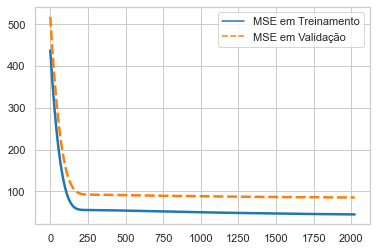

In [44]:
#plot
sns.set(style = "whitegrid")
sns.lineplot (data=df,
             palette = "tab10",
             linewidth = 2.5)

In [45]:
previsoes = modelo.predict(x_teste).flatten()

In [47]:
previsoes

array([20.941448, 18.546043, 23.845505, 21.34364 , 20.622059, 20.716694,
       24.436962, 21.917355, 21.095226, 20.90596 , 25.744087, 23.384167,
       21.302235, 22.70399 , 23.21856 , 21.633453, 26.873772, 23.313194,
       29.292831, 20.036514, 20.49194 , 21.041996, 19.326767, 20.941448,
       19.102013, 23.466972, 22.845943, 14.565531, 17.392698, 34.964916,
       21.51516 , 18.386349, 20.083836, 22.78088 , 31.357021, 24.2477  ,
       21.82272 , 27.885162, 25.649452, 32.007626, 27.465229, 30.440262,
       31.877506, 17.392698, 23.035206, 23.242218, 18.510555, 23.508377,
       36.910816, 35.10095 , 18.315372, 34.50358 , 30.919342, 25.803234,
       23.597095, 22.78088 , 26.010242, 27.707726, 24.643974, 24.271355,
       23.14167 , 19.190731, 23.372337, 22.786797, 21.136627, 20.296757,
       21.26675 , 22.17168 , 21.668938, 21.580223, 26.927002, 24.756351,
       11.265194, 14.293459, 17.309895, 23.313194, 17.682514, 18.143852,
       23.348679, 21.526993, 20.302673, 25.844635, 